In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter

import os; print(os.getcwd())

import result_utils

/net/lem/data1/regt/retrieval_base/Luhman_16/figures


In [2]:
name_A = 'Luhman 16A'; name_B = 'Luhman 16B'
color_A = '#FF622E'; color_B = '#396ED8'

lw_d = 0.8
lw_m = 1.5

res_alpha = 0.85

A = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_22_1column_n1000/test_')
B = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n1000/test_')

/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_22_1column_n1000/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_22_1column_n1000/test_.txt
/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n1000/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n1000/test_.txt


In [3]:
A_2c = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_23_2column_n1000/test_')
A.compare_evidence(A_2c)

P_cl_1 = 10**A_2c.posterior[:,21]
print('{:.1f} +{:.1f}/{:.1f}'.format(np.median(P_cl_1), *np.quantile(P_cl_1, q=[0.84,0.16])-np.median(P_cl_1)))

P_cl_2 = 10**A_2c.posterior[:,27]
print('{:.1f} +{:.1f}/{:.1f}'.format(np.median(P_cl_2), *np.quantile(P_cl_2, q=[0.84,0.16])-np.median(P_cl_2)))

/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_23_2column_n1000/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_23_2column_n1000/test_.txt
Current vs. given: ln(B)=13.34 | sigma=5.52
Given vs. current: ln(B)=-13.34 | sigma=nan
9.8 +1.1/-0.9
35.9 +8.8/-6.6


In [4]:
B_2c = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_63_2column_n1000/test_')
B.compare_evidence(B_2c)

/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_63_2column_n1000/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_63_2column_n1000/test_.txt
Current vs. given: ln(B)=-0.67 | sigma=1.14
Given vs. current: ln(B)=0.67 | sigma=1.80


(0.5117401493732677, 1.138706776354429)

In [5]:
A.posterior.shape

(8632, 25)

In [6]:
def latex_formatting(p_A1=None, p_A2=None, p_B1=None, p_B2=None, decimals=2):
    if decimals == 0:
        style = '{:.0f}^+{:.0f}/{:.0f}'
    elif decimals == 1:
        style = '{:.1f}^+{:.1f}/{:.1f}'
    elif decimals == 2:
        style = '{:.2f}^+{:.2f}/{:.2f}'
    elif decimals == 3:
        style = '{:.3f}^+{:.3f}/{:.3f}'

    full_str = []
    for p in [p_A1, p_A2, p_B1, p_B2]:
        if p is None:
            continue

        str_i = style.format(np.median(p), *np.quantile(p, q=[0.84,0.16])-np.median(p))
        str_i = str_i.replace('+', '{+')
        str_i = str_i.replace('/', '}_{')
        str_i += '}'

        full_str.append('$'+str_i+'$')

    print(' & '.join(full_str)+r' \\')

#latex_formatting(A.posterior[:,9], A_2c.posterior[:,6], B.posterior[:,9], B_2c.posterior[:,6], decimals=2) # H2O
#latex_formatting(A.posterior[:,12], A_2c.posterior[:,9], B.posterior[:,12], B_2c.posterior[:,9], decimals=2) # Na
#latex_formatting(A.posterior[:,11], A_2c.posterior[:,8], B.posterior[:,11], B_2c.posterior[:,8], decimals=2) # K
#latex_formatting(A.posterior[:,10], A_2c.posterior[:,7], B.posterior[:,10], B_2c.posterior[:,7], decimals=2) # HF

# FeH
#latex_formatting(A.posterior[:,13], B.posterior[:,13], decimals=2); latex_formatting(A_2c.posterior[:,23], A_2c.posterior[:,29], B_2c.posterior[:,23], B_2c.posterior[:,29], decimals=2) # FeH
#latex_formatting(A.posterior[:,14], B.posterior[:,14], decimals=2); latex_formatting(A_2c.posterior[:,24], A_2c.posterior[:,30], B_2c.posterior[:,24], B_2c.posterior[:,30], decimals=1) # log P_FeH
#latex_formatting(A.posterior[:,15], B.posterior[:,15], decimals=1); latex_formatting(A_2c.posterior[:,25], A_2c.posterior[:,31], B_2c.posterior[:,25], B_2c.posterior[:,31], decimals=1) # alpha_FeH

#latex_formatting(A.posterior[:,2], A_2c.posterior[:,2], B.posterior[:,2], B_2c.posterior[:,2], decimals=2) # log_g
#latex_formatting(A.posterior[:,4], A_2c.posterior[:,4], B.posterior[:,4], B_2c.posterior[:,4], decimals=2) # vsini
#latex_formatting(A.posterior[:,5], A_2c.posterior[:,5], B.posterior[:,5], B_2c.posterior[:,5], decimals=2) # epsilon_limb
#latex_formatting(A.posterior[:,3], A_2c.posterior[:,3], B.posterior[:,3], B_2c.posterior[:,3], decimals=2) # vrad
latex_formatting(A_2c.posterior[:,19], 1-A_2c.posterior[:,19], B_2c.posterior[:,19], 1-B_2c.posterior[:,19], decimals=3) # coverage_fraction

#latex_formatting(A.posterior[:,16], A_2c.posterior[:,10], B.posterior[:,16], B_2c.posterior[:,10], decimals=2) # nabla_0
#latex_formatting(A.posterior[:,17], A_2c.posterior[:,11], B.posterior[:,17], B_2c.posterior[:,11], decimals=2) # nabla_1
#latex_formatting(A.posterior[:,18], A_2c.posterior[:,12], B.posterior[:,18], B_2c.posterior[:,12], decimals=3) # nabla_2
#latex_formatting(A.posterior[:,19], A_2c.posterior[:,13], B.posterior[:,19], B_2c.posterior[:,13], decimals=2) # nabla_3
#latex_formatting(A.posterior[:,20], A_2c.posterior[:,14], B.posterior[:,20], B_2c.posterior[:,14], decimals=2) # nabla_4
#latex_formatting(A.posterior[:,22], A_2c.posterior[:,16], B.posterior[:,22], B_2c.posterior[:,16], decimals=2) # log P_phot
#latex_formatting(A.posterior[:,21], A_2c.posterior[:,15], B.posterior[:,21], B_2c.posterior[:,15], decimals=0) # T_phot
#latex_formatting(A.posterior[:,24], A_2c.posterior[:,18], B.posterior[:,24], B_2c.posterior[:,18], decimals=1) # log P-1
#latex_formatting(A.posterior[:,23], A_2c.posterior[:,17], B.posterior[:,23], B_2c.posterior[:,17], decimals=1) # log P+1

# clouds
#latex_formatting(A.posterior[:,6], B.posterior[:,6], decimals=2); latex_formatting(A_2c.posterior[:,20], A_2c.posterior[:,26], B_2c.posterior[:,20], B_2c.posterior[:,26], decimals=1) # kappa_cl
#latex_formatting(A.posterior[:,7], B.posterior[:,7], decimals=2); latex_formatting(A_2c.posterior[:,21], A_2c.posterior[:,27], B_2c.posterior[:,21], B_2c.posterior[:,27], decimals=2) # log P_cl
#latex_formatting(A.posterior[:,8], B.posterior[:,8], decimals=1); latex_formatting(A_2c.posterior[:,22], A_2c.posterior[:,28], B_2c.posterior[:,22], B_2c.posterior[:,28], decimals=1) # alpha_FeH

#latex_formatting(A.posterior[:,0], A_2c.posterior[:,0], B.posterior[:,0], B_2c.posterior[:,0], decimals=3) # log a
#latex_formatting(A.posterior[:,1], A_2c.posterior[:,1], B.posterior[:,1], B_2c.posterior[:,1], decimals=3) # log l

$0.942^{+0.006}_{-0.006}$ & $0.058^{+0.006}_{-0.006}$ & $0.024^{+0.006}_{-0.004}$ & $0.976^{+0.004}_{-0.006}$ \\


In [7]:
B_2c.compare_evidence(B)

Current vs. given: ln(B)=0.67 | sigma=1.80
Given vs. current: ln(B)=-0.67 | sigma=1.14


(1.9541167548114178, 1.803696249150544)

In [8]:
A.load_components(['Chem', 'PT', 'Cloud', 'm_spec'])
B.load_components(['Chem', 'PT', 'Cloud', 'm_spec'])

In [9]:
contr_A = np.nansum(A.m_spec['J1226_1'].integrated_contr, axis=0)
contr_B = np.nansum(B.m_spec['J1226_1'].integrated_contr, axis=0)

In [10]:
cmap_A = mpl.colors.LinearSegmentedColormap.from_list('', ['w',color_A])
env_colors_A = cmap_A([0.4,0.6,0.8])
env_colors_A[:,3] = 0.5

cmap_B = mpl.colors.LinearSegmentedColormap.from_list('', ['w',color_B])
env_colors_B = cmap_B([0.4,0.6,0.8])
env_colors_B[:,3] = 0.5

3 21


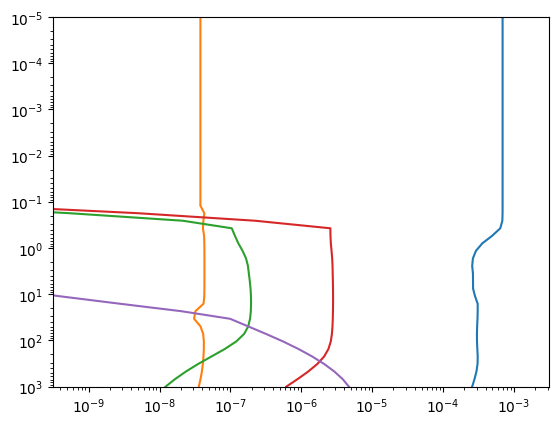

In [61]:
import pyfastchem as pyfc
import os

class FastChemistry():

    def __init__(self, pressures):

        self.pressures = pressures

        pyfc_path = '/net/lem/data1/regt/fastchem/'

        self.fastchem = pyfc.FastChem(
            f'{pyfc_path}/input/element_abundances/asplund_2020_extended.dat', 
            f'{pyfc_path}/input/logK/logK_extended.dat',
            f'{pyfc_path}/input/logK/logK_condensates.dat', 
            1)

        # Create in/out-put structures for FastChem
        self.input = pyfc.FastChemInput()
        self.input.pressure = self.pressures[::-1] # Flip to decrease

        self.output = pyfc.FastChemOutput()

        # Use equilibrium condensation
        self.input.equilibrium_condensation = True
        # Use rainout condensation approach
        self.input.rainout_condensation     = True

        # Configure FastChem's internal parameters
        self.fastchem.setParameter('accuracyChem', 1e-5)
        #self.fastchem.setParameter('accuracyElementConservation', 1e-5)
        #self.fastchem.setParameter('accuracyNewton', 1e-5)
        
        self.fastchem.setParameter('nbIterationsChem', 10000)
        #self.fastchem.setParameter('nbIterationsNewton', 10000)
        #self.fastchem.setParameter('nbIterationsNelderMead', 10000)

        # ------------------------------------------------------------------

        # Make a copy of the solar abundances from FastChem
        self.solar_abundances = np.array(self.fastchem.getElementAbundances())

        # Indices of carbon-bearing species
        self.index_C = np.array(self.fastchem.getElementIndex('C'))
        self.index_O = np.array(self.fastchem.getElementIndex('O'))

        print(self.index_C, self.index_O)

        # Compute the solar C/O ratio
        self.CO_solar = self.solar_abundances[self.index_C] / \
            self.solar_abundances[self.index_O]

        # Indices of H/He-bearing species
        index_H  = np.array(self.fastchem.getElementIndex('H'))
        index_He = np.array(self.fastchem.getElementIndex('He'))

        self.mask_metal = np.ones_like(self.solar_abundances, dtype=bool)
        self.mask_metal[index_H]  = False
        self.mask_metal[index_He] = False

    def get_VMR(self, species_i):
        index = self.fastchem.getGasSpeciesIndex(species_i)
        return self.VMR[:,index]
    
    def get_condensate_number_density(self, species_i):
        index = self.fastchem.getCondSpeciesIndex(species_i)
        return np.array(self.output.number_densities_cond)[::-1,index]

    def __call__(self, T, CO, FeH):

        temperature = T * np.ones_like(self.pressures)
        temperature[temperature<200] = 200
        self.input.temperature = temperature[::-1] # Flip for FastChem usage

        # Make a copy to modify the elemental abundances
        element_abundances = self.solar_abundances.copy()
        metallicity_wrt_solar = 10**FeH

        # Apply C/O ratio and Fe/H to elemental abundances
        element_abundances[self.index_C] = element_abundances[self.index_O] * CO
        #print(element_abundances[self.index_C] / element_abundances[self.index_O])
        #element_abundances[self.index_C] = element_abundances[self.index_O] * CO
        element_abundances[self.mask_metal] *= metallicity_wrt_solar

        # Update the element abundances
        self.fastchem.setElementAbundances(element_abundances)

        # Compute the number densities
        fastchem_flag = self.fastchem.calcDensities(self.input, self.output)

        if fastchem_flag != 0:
            # FastChem failed to converge
            print('Failed to converge')
        if np.amin(self.output.element_conserved) != 1:
            # Failed element conservation
            print('Failed element conservation')

        # Compute the volume-mixing ratio of all species
        gas_number_density_tot = np.array(self.input.pressure)*1e6 / \
            (1.3807e-16 * np.array(self.input.temperature))
        gas_number_density     = np.array(self.output.number_densities)

        self.VMR = gas_number_density / gas_number_density_tot[:,None]
        self.VMR = self.VMR[::-1] # Flip back

# Compute the chemical equilibrium abundances
FC = FastChemistry(pressures=B.PT['J1226_1'].pressure)
FC(T=B.PT['J1226_1'].temperature, CO=0.59, FeH=0.0)

FC_VMR = {hill_i: FC.get_VMR(hill_i) for hill_i in ['H2O1', 'F1H1', 'Fe1H1', 'Na', 'K']}

plt.plot(FC_VMR['H2O1'], B.PT['J1226_1'].pressure)
plt.plot(FC_VMR['F1H1'], B.PT['J1226_1'].pressure)
plt.plot(FC_VMR['K'], B.PT['J1226_1'].pressure)
plt.plot(FC_VMR['Na'], B.PT['J1226_1'].pressure)
plt.plot(FC_VMR['Fe1H1'], B.PT['J1226_1'].pressure)

plt.yscale('log'); plt.xscale('log')
plt.ylim(1e3,1e-5); plt.xlim(10**(-9.5),10**(-2.5))
plt.show()

In [12]:
def plot_condensation_curve(ax, pressure, species, FeH=-0.0, ann_kwargs=None, **kwargs):

    coeffs = {
        'CaTiO3': [5.125, -0.277, -0.554], # Wakeford et al. (2017)
        'Fe': [5.44, -0.48, -0.48], # Visscher et al. (2010)
        'Mg2SiO4': [5.89, -0.37, -0.73], # Visscher et al. (2010)
        'MgSiO3': [6.26, -0.35, -0.70], # Visscher et al. (2010)
        'Cr': [6.576, -0.486, -0.486], # Morley et al. (2012)
        'KCl': [12.479, -0.879, -0.879], # Morley et al. (2012)
        'MnS': [7.45, -0.42, -0.84], # Visscher et al. (2006)
        'Na2S': [10.05, -0.72, -1.08], # Visscher et al. (2006)
        'ZnS': [12.52, -0.63, -1.26], # Visscher et al. (2006)
        'H2S': [86.49, -8.54, -8.54], # Visscher et al. (2006)
    }

    a, b, c = coeffs[species]
    y = a + b*np.log10(pressure) + c*FeH
    T = 1e4/y
    
    ax.plot(T, pressure, **kwargs, zorder=-2)

    if ann_kwargs is None:
        return
    
    y = ann_kwargs.get('y', 1e0)
    ann_kwargs['xy'] = (np.interp(np.log10(y),np.log10(pressure),T), y)
    ann_kwargs.pop('y')

    ax.annotate(**ann_kwargs, zorder=-1)

def plot_envelopes(
        ax, y, x, x_indices=[(0,6),(1,5),(2,4)], colors=['0.0','0.5','1.0'], 
        median_kwargs=None, **kwargs
        ):
    
    x = posterior_to_envelope(x)

    patch = None
    for i, (idx_l, idx_u) in enumerate(x_indices):

        patch = ax.fill_betweenx(
            y=y, x1=x[idx_l], x2=x[idx_u], fc=colors[i], ec='none', **kwargs
            )
    
    line = None
    if median_kwargs is not None:
        idx_m = median_kwargs.get('idx', 3)
        try:
            median_kwargs.pop('idx')
        except KeyError:
            pass

        line, = ax.plot(x[idx_m], y, **median_kwargs)

        m = np.mean(x[idx_m])
        print('{:.2f}'.format(np.log10(m)))
        for i, (idx_l, idx_u) in enumerate(x_indices):
            u = np.mean(x[idx_u])
            l = np.mean(x[idx_l])
            print('{:.2f}'.format(np.log10(u)-np.log10(m)), '{:.2f}'.format(np.log10(l)-np.log10(m)))
        print()

    return (line, patch, line)

def posterior_to_envelope(posterior, q=0.5+1/2*np.array([-0.997,-0.95,-0.68,0.,0.68,0.95,0.997])):
    return np.quantile(posterior, q=q, axis=0)

In [13]:
def get_fine_cloud_posterior(Res, indices=[6,7,8], N=250):
    
    pressure_fine = np.logspace(
        np.log10(Res.Cloud['J1226_1'].pressure.min()), 
        np.log10(Res.Cloud['J1226_1'].pressure.max()), N
        )

    kappa_cl_0 = 10**Res.posterior[:,indices[0]]
    P_cl_0 = 10**Res.posterior[:,indices[1]]
    f_sed  = Res.posterior[:,indices[2]]

    #print(P_cl_0)
    print('{:.1f} +{:.1f}/{:.1f}'.format(np.median(P_cl_0), *np.quantile(P_cl_0, q=[0.84,0.16])-np.median(P_cl_0)))

    kappa_fine = kappa_cl_0[:,None] * (pressure_fine/P_cl_0[:,None])**f_sed[:,None]
    kappa_fine[pressure_fine>P_cl_0[:,None]] = 0.

    return pressure_fine, kappa_fine

pressure_fine, A_cloud_posterior_fine = get_fine_cloud_posterior(A)
pressure_fine, B_cloud_posterior_fine = get_fine_cloud_posterior(B)

13.3 +1.3/-1.2
18.3 +1.4/-1.1


3.08
0.10 -0.06
0.07 -0.04
0.03 -0.03

3.07
0.09 -0.08
0.06 -0.06
0.03 -0.03

-2.69
0.33 -0.30
0.23 -0.24
0.12 -0.12

-2.22
2.44 -0.97
1.51 -0.53
0.61 -0.26

FeH A
-8.08
0.31 -0.41
0.20 -0.26
0.10 -0.11

FeH B
-9.10
0.30 -0.37
0.25 -0.30
0.15 -0.19

H2O A
-3.38
0.13 -0.12
0.10 -0.09
0.06 -0.05

H2O B
-3.38
0.10 -0.12
0.07 -0.09
0.04 -0.05

HF A
-7.28
0.21 -0.22
0.14 -0.14
0.07 -0.07

HF B
-7.21
0.13 -0.16
0.09 -0.11
0.05 -0.06

K A
-6.42
0.15 -0.14
0.11 -0.10
0.07 -0.06

K B
-6.55
0.12 -0.14
0.08 -0.09
0.05 -0.05

Na A
-4.95
0.18 -0.17
0.13 -0.12
0.07 -0.06

Na B
-5.09
0.14 -0.17
0.09 -0.11
0.05 -0.06



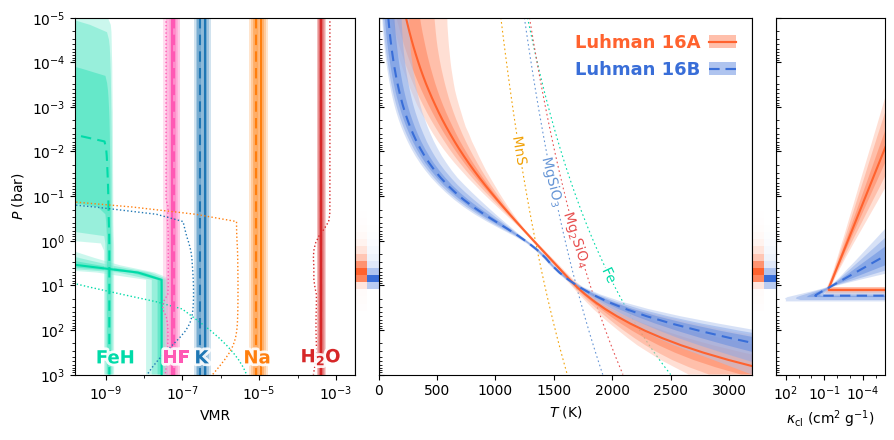

In [15]:
fig = plt.figure(figsize=(9,4.3))
gs = fig.add_gridspec(
    #nrows=1, ncols=5, hspace=0.0, wspace=0.0, width_ratios=[0.37,0.02,0.48,0.02,0.15], 
    nrows=1, ncols=5, hspace=0.0, wspace=0.0, width_ratios=[0.36,0.03,0.48,0.03,0.14], 
)
ax_VMR = fig.add_subplot(gs[0,0])
ax_PT  = fig.add_subplot(gs[0,2])
ax_cl  = fig.add_subplot(gs[0,4])
ax_contr = np.array([fig.add_subplot(gs[0,1]), fig.add_subplot(gs[0,3])])

# Emission contribution
for ax_i in ax_contr:
    ax_i.imshow(
        contr_A.reshape(-1,1), cmap=cmap_A, aspect='auto', interpolation='none', 
        extent=[0,0.5,0,1], transform=ax_i.transAxes, 
    )
    ax_i.imshow(
        contr_B.reshape(-1,1), cmap=cmap_B, aspect='auto', interpolation='none', 
        extent=[0.5,1,0,1], transform=ax_i.transAxes, 
    )
    ax_i.spines[['bottom','top']].set_visible(False)
    ax_i.set(yticks=[], xticks=[])

# PT profile
handle_A = plot_envelopes(
    ax_PT, A.PT['J1226_1'].pressure, x=A.PT['J1226_1'].temperature_posterior, 
    colors=env_colors_A, median_kwargs={'color':color_A, 'lw':lw_m}
    )
handle_B = plot_envelopes(
    ax_PT, B.PT['J1226_1'].pressure, x=B.PT['J1226_1'].temperature_posterior, 
    colors=env_colors_B, median_kwargs={'color':color_B, 'lw':lw_m, 'ls':(0,(5,3))}
    )
ax_PT.legend(
    loc='upper right', bbox_to_anchor=(1,1), frameon=False, 
    handles=[handle_A,handle_B], labels=[name_A,name_B], 
    markerfirst=False, handlelength=1.5, handletextpad=0.5, 
    labelcolor='linecolor', prop={'weight':'bold', 'size':13}, 
)


ax_PT.tick_params(axis='y', which='both', direction='in')
ax_PT.set(
    yscale='log', ylim=(1e3,1e-5), yticklabels=[], 
    xlim=(0,3200), xlabel=r'$T\ (\mathrm{K})$', xticks=np.arange(0,3500,500), 
    )

# Condensation curves
ann_kwargs = dict(
    text='Fe', y=6, clip_on=True, ha='center', va='center', 
    c='#00DBA8', fontsize=10, rotation=-65, #fontweight='bold', w
    path_effects=[pe.withStroke(linewidth=3, foreground='w')],
)
ls = (0,(1.5,2.5)); lw = 0.8
plot_condensation_curve(ax_PT, A.PT['J1226_1'].pressure, species='Fe', ann_kwargs=ann_kwargs, lw=lw, ls=ls, c=ann_kwargs['c'])

ann_kwargs['text'] = r'$\mathrm{Mg_2SiO_4}$'
ann_kwargs['y'] = 1.; ann_kwargs['c'] = '#E75252'; ann_kwargs['rotation'] = -72
plot_condensation_curve(ax_PT, A.PT['J1226_1'].pressure, species='Mg2SiO4', ann_kwargs=ann_kwargs, lw=lw, ls=ls, c=ann_kwargs['c'])

ann_kwargs['text'] = r'$\mathrm{MgSiO_3}$'
ann_kwargs['y'] = 5e-2; ann_kwargs['c'] = '#6796D6'; ann_kwargs['rotation'] = -76
plot_condensation_curve(ax_PT, A.PT['J1226_1'].pressure, species='MgSiO3', ann_kwargs=ann_kwargs, lw=lw, ls=ls, c=ann_kwargs['c'])

ann_kwargs['text'] = r'$\mathrm{MnS}$'
ann_kwargs['y'] = 1e-2; ann_kwargs['c'] = '#F1A208'; ann_kwargs['rotation'] = -80
plot_condensation_curve(ax_PT, A.PT['J1226_1'].pressure, species='MnS', ann_kwargs=ann_kwargs, lw=lw, ls=ls, c=ann_kwargs['c'])

# Clouds
plot_envelopes(
    ax_cl, pressure_fine, x=A_cloud_posterior_fine, colors=env_colors_A, median_kwargs={'color':color_A, 'lw':lw_m}
    )
plot_envelopes(
    ax_cl, pressure_fine, x=B_cloud_posterior_fine, colors=env_colors_B, median_kwargs={'color':color_B, 'lw':lw_m, 'ls':(0,(5,3))}
    )

ax_cl.tick_params(axis='y', which='both', direction='in')
ax_cl.set(
    yscale='log', ylim=(1e3,1e-5), yticklabels=[], 
    xscale='log', xticks=10.**np.array([2,-1,-4]), xlim=(6e2,2e-6), 
    xlabel=r'$\kappa_\mathrm{cl}\ (\mathrm{cm^2\ g^{-1}})$'
    )
ax_cl.set_xticks([1e1,1e0,1e-2,1e-3,1e-5], labels=[], minor=True)

# VMRs
c_species = {'HF':'#FF59B4', 'FeH':'#00DBA8', 'H2O':'C3', 'K':'C0', 'Na':'C1'}
dx_species = {'HF':+0.35, 'FeH':-0.85, 'H2O':0.0, 'K':-0.05, 'Na':-0.05}
for i, species_i in enumerate(A.Chem['J1226_1'].species):

    if species_i in ['H2', 'He']:
        continue
    
    c_i = c_species.get(species_i, 'k')
    cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['w',c_i])
    env_colors_i = cmap([0.4,0.6,0.8])
    env_colors_i[:,3] = 0.5

    print(species_i, 'A')
    plot_envelopes(
        ax_VMR, A.Chem['J1226_1'].pressure, x=A.Chem['J1226_1'].VMRs_posterior[species_i], 
        colors=env_colors_i, median_kwargs={'color':c_i, 'lw':lw_m}
        #x_indices=[(2,4)], colors=[env_colors_i[-1]], median_kwargs={'color':c_i, 'lw':lw_m}
        #x_indices=[(0,6)], colors=[env_colors_i[1]], median_kwargs={'color':c_i, 'lw':lw_m}
        )
    print(species_i, 'B')
    plot_envelopes(
        ax_VMR, B.Chem['J1226_1'].pressure, x=B.Chem['J1226_1'].VMRs_posterior[species_i], 
        colors=env_colors_i, median_kwargs={'color':c_i, 'lw':lw_m, 'ls':(0,(5,3))}
        #x_indices=[(2,4)], colors=[env_colors_i[-1]], median_kwargs={'color':c_i, 'lw':lw_m, 'ls':(0,(5,3))}
        #x_indices=[(0,6)], colors=[env_colors_i[1]], median_kwargs={'color':c_i, 'lw':lw_m, 'ls':(0,(5,3))}
        )    

    hill_i = B.Chem['J1226_1'].hill[i]
    ax_VMR.plot(FC_VMR[hill_i], B.PT['J1226_1'].pressure, c=c_i, lw=1, ls=':')

    x_i = A.Chem['J1226_1'].VMRs_posterior[species_i][0,-1]
    x_i = 10**(np.log10(x_i) + dx_species.get(species_i,0))

    if species_i == 'H2O':
        species_i = r'$\mathrm{\bf H_2O}$'

    ax_VMR.annotate(
        species_i, xy=(x_i, 0.02), xycoords=ax_VMR.get_xaxis_transform(), zorder=3, clip_on=True, 
        ha='center', va='bottom', c=c_i, fontsize=13, fontweight='bold', 
        path_effects=[pe.withStroke(linewidth=4, foreground='w', alpha=0.9)],
    )

ax_VMR.set(
    yscale='log', ylim=(1e3,1e-5), ylabel=r'$P\ (\mathrm{bar})$', 
    #xscale='log', xlim=(10**(-9.5),10**(-2.5)), xlabel=r'VMR',
    xscale='log', xlim=(10**(-9.8),10**(-2.5)), xlabel=r'VMR',
    )
ax_VMR.set_xticks([1e-9,1e-7,1e-5,1e-3], minor=False)
ax_VMR.set_xticks([1e-8,1e-6,1e-4,1e-3], labels=[], minor=True)

'''
path = 'PT_profiles/t1300g3160nc_m0.0_co1.0.pt'
data = np.loadtxt(path, skiprows=2)
ax_PT.plot(data[:,2], data[:,1], c='k')

path = 'PT_profiles/t1300g3160f4_m0.0_co1.0.pt'
data = np.loadtxt(path, skiprows=2)
ax_PT.plot(data[:,2], data[:,1], c='k', ls='--')
'''

plt.subplots_adjust(left=0.08, bottom=0.13, top=0.96, right=0.98)
plt.savefig(f'./plots/J_band_profiles_new_2.pdf')
plt.show()

In [71]:
1-(0.23+0.01+0.4)

0.36

3.08
0.10 -0.06
0.07 -0.04
0.03 -0.03

3.07
0.09 -0.08
0.06 -0.06
0.03 -0.03

-2.69
0.33 -0.30
0.23 -0.24
0.12 -0.12

-2.22
2.44 -0.97
1.51 -0.53
0.61 -0.26



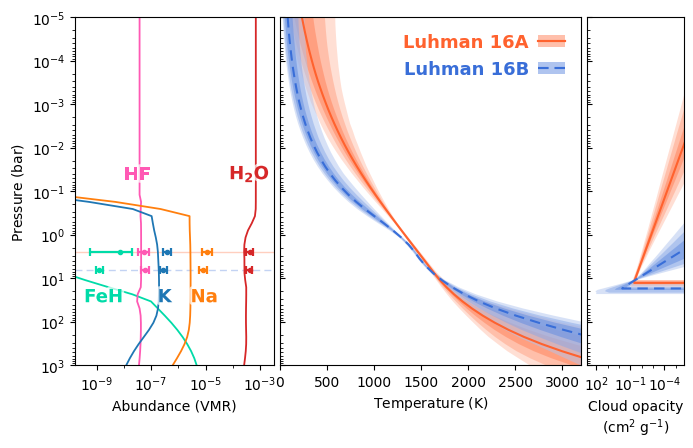

In [131]:
fig = plt.figure(figsize=(7.,4.3))
gs = fig.add_gridspec(
    nrows=1, ncols=5, hspace=0.0, wspace=0.0, width_ratios=[0.33,0.01,0.50,0.01,0.16], 
)
ax_VMR = fig.add_subplot(gs[0,0])
ax_PT  = fig.add_subplot(gs[0,2])
ax_cl  = fig.add_subplot(gs[0,-1])

# PT profile
handle_A = plot_envelopes(
    ax_PT, A.PT['J1226_1'].pressure, x=A.PT['J1226_1'].temperature_posterior, 
    colors=env_colors_A, median_kwargs={'color':color_A, 'lw':lw_m}, 
    )
handle_B = plot_envelopes(
    ax_PT, B.PT['J1226_1'].pressure, x=B.PT['J1226_1'].temperature_posterior, 
    colors=env_colors_B, median_kwargs={'color':color_B, 'lw':lw_m, 'ls':(0,(5,3))}, 
    )
ax_PT.legend(
    loc='upper right', bbox_to_anchor=(1,1), frameon=False, 
    handles=[handle_A,handle_B], labels=[name_A,name_B], 
    # handles=[handle_A], labels=[name_A], 
    markerfirst=False, handlelength=1.5, handletextpad=0.5, 
    labelcolor='linecolor', prop={'weight':'bold', 'size':13}, 
)

ax_PT.tick_params(axis='y', which='both', direction='in')
ax_PT.set(
    yscale='log', ylim=(1e3,1e-5), yticklabels=[], 
    xlim=(0,3200), xlabel=r'Temperature $(\mathrm{K})$', xticks=np.arange(0,3500,500), 
    )

# Clouds
plot_envelopes(
    ax_cl, pressure_fine, x=A_cloud_posterior_fine, colors=env_colors_A, median_kwargs={'color':color_A, 'lw':lw_m}
    )
plot_envelopes(
    ax_cl, pressure_fine, x=B_cloud_posterior_fine, colors=env_colors_B, median_kwargs={'color':color_B, 'lw':lw_m, 'ls':(0,(5,3))}
    )

ax_cl.tick_params(axis='y', which='both', direction='in')
ax_cl.set(
    yscale='log', ylim=(1e3,1e-5), yticklabels=[], 
    xscale='log', xticks=10.**np.array([2,-1,-4]), xlim=(6e2,2e-6), 
    # xlabel=r'$\kappa_\mathrm{cl}\ (\mathrm{cm^2\ g^{-1}})$'
    xlabel='Cloud opacity\n'+r'$(\mathrm{cm^2\ g^{-1}})$',
    )
ax_cl.set_xticks([1e1,1e0,1e-2,1e-3,1e-5], labels=[], minor=True)

# VMRs
c_species = {'HF':'#FF59B4', 'FeH':'#00DBA8', 'H2O':'C3', 'K':'C0', 'Na':'C1'}
dx_species = {'HF':+0., 'FeH':-0.85, 'H2O':0.0, 'K':-0.05, 'Na':-0.05}
dy_species = {'HF':+0.5, 'FeH':+0.15, 'H2O':+0.5, 'K':+0.15, 'Na':+0.15}
for i, species_i in enumerate(A.Chem['J1226_1'].species):

    if species_i in ['H2', 'He']:
        continue
    
    c_i = c_species.get(species_i, 'k')
    cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['w',c_i])
    env_colors_i = cmap([0.4,0.6,0.8])
    env_colors_i[:,3] = 0.5

    P = 5
    idx_P = np.argmin(np.abs(A.Chem['J1226_1'].pressure - P))

    VMR_q = np.quantile(A.Chem['J1226_1'].VMRs_posterior[species_i][:,idx_P], q=result_utils.q)
    xerr = np.abs(VMR_q[[0,-1]]-VMR_q[3])[:,None]
    ax_VMR.errorbar(
        VMR_q[3], 10**(np.log10(P)-0.3), xerr=xerr, fmt='o', c=c_i, lw=1, label=species_i, markersize=3, capsize=3., elinewidth=1.6, capthick=1.6, 
    )

    VMR_q = np.quantile(B.Chem['J1226_1'].VMRs_posterior[species_i][:,idx_P], q=result_utils.q)
    xerr = np.abs(VMR_q[[0,-1]]-VMR_q[3])[:,None]
    ax_VMR.errorbar(
        VMR_q[3], 10**(np.log10(P)+0.1), xerr=xerr, fmt='o', c=c_i, lw=1, markersize=3, capsize=3., elinewidth=1.6, capthick=1.6, 
    )

    hill_i = B.Chem['J1226_1'].hill[i]
    ax_VMR.plot(FC_VMR[hill_i], B.PT['J1226_1'].pressure, c=c_i, lw=1.3, ls='-')

    x_i = A.Chem['J1226_1'].VMRs_posterior[species_i][0,-1]
    x_i = 10**(np.log10(x_i) + dx_species.get(species_i,0))

    y_i = 0.02+dy_species.get(species_i,0)

    if species_i == 'H2O':
        species_i = r'$\mathrm{\bf H_2O}$'

    ax_VMR.annotate(
        species_i, xy=(x_i,y_i), xycoords=ax_VMR.get_xaxis_transform(), zorder=3, clip_on=True, 
        ha='center', va='bottom', c=c_i, fontsize=13, fontweight='bold', 
        path_effects=[pe.withStroke(linewidth=4, foreground='w', alpha=0.7)],
    )

ax_VMR.axhline(10**(np.log10(P)-0.3), c=color_A, lw=1, zorder=-1, alpha=0.3)
ax_VMR.axhline(10**(np.log10(P)+0.1), c=color_B, lw=1, ls=(0,(5,3)), zorder=-1, alpha=0.3)

ax_VMR.set(
    yscale='log', ylim=(1e3,1e-5), ylabel=r'Pressure $(\mathrm{bar})$', 
    xscale='log', xlim=(10**(-9.8),10**(-2.5)), xlabel=r'Abundance (VMR)',
    )
ax_VMR.set_xticks([1e-9,1e-7,1e-5,1e-3], minor=False)
ax_VMR.set_xticks([1e-8,1e-6,1e-4,1e-3], labels=[], minor=True)

plt.subplots_adjust(left=0.11, bottom=0.15, top=0.96, right=0.98)
plt.savefig(f'./plots/J_band_profiles_new_2.pdf')
plt.show()